In [1]:
#!pip install biopython

from Bio import Entrez
from Bio import SeqIO

# Read the email from a file to keep it secure
try:
    with open("email.txt", "r") as f:
        email = f.read().strip()
        if not email:
            print("Warning: email.txt is empty. Please add your email address.")
            Entrez.email = "placeholder@example.com" # Using a placeholder for now
        else:
            Entrez.email = email
except FileNotFoundError:
    print("Error: email.txt file not found. Please create it and add your email.")
    Entrez.email = "placeholder@example.com" # Using a placeholder for now


# Accession numbers for the DNA sequences we want to download
accession_numbers = {
    "human": "NC_012920",
    "neanderthal": "NC_011137",
    "chimp" : "NC_001643"
    
}

# Loop through each accession number
for name, acc_num in accession_numbers.items():
    try:
        handle = Entrez.efetch(db="nucleotide", id=acc_num, rettype="fasta", retmode="text")
        record = SeqIO.read(handle, "fasta")
        handle.close()

        file_name = f"{name}.fasta"
        with open(file_name, "w") as f:
            f.write(record.format("fasta"))
        
        print(f"Successfully created {file_name}.")
    
    except Exception as e:
        print(f"An error occurred: Could not fetch data for {acc_num}. Error: {e}")

Error: email.txt file not found. Please create it and add your email.
Successfully created human.fasta.
Successfully created neanderthal.fasta.
Successfully created chimp.fasta.


In [2]:
### from Bio import SeqIO

# Read the human.fasta file
# We are creating a SeqRecord object from the file.
print("Reading human.fasta...")
human_record = SeqIO.read("human.fasta", "fasta")

# Read the neanderthal.fasta file
print("Reading neanderthal.fasta...")
neanderthal_record = SeqIO.read("neanderthal.fasta", "fasta")

# Read the chimp.fasta file
print("Reading chimp.fasta...")
chimp_record = SeqIO.read("chimp.fasta", "fasta")

# Let's print some basic information about the sequences
print("\n--- Basic Information ---")
print("Human:")
print(f"ID: {human_record.id}")
print(f"Name: {human_record.name}")
print(f"Description: {human_record.description}")
print(f"Length: {len(human_record.seq)} base pairs")

print("\nNeanderthal:")
print(f"ID: {neanderthal_record.id}")
print(f"Name: {neanderthal_record.name}")
print(f"Description: {neanderthal_record.description}")
print(f"Length: {len(neanderthal_record.seq)} base pairs")

print("\nChimp:")
print(f"ID: {chimp_record.id}")
print(f"Name: {chimp_record.name}")
print(f"Description: {chimp_record.description}")
print(f"Length: {len(chimp_record.seq)} base pairs")

# Now let's print a small part of the DNA sequence itself
print("\n--- First 50 base pairs of the sequences ---")
print(f"Human: {human_record.seq[:50]}...")
print(f"Neanderthal: {neanderthal_record.seq[:50]}...")
print(f"Chimp: {chimp_record.seq[:50]}...")

Reading human.fasta...
Reading neanderthal.fasta...
Reading chimp.fasta...

--- Basic Information ---
Human:
ID: NC_012920.1
Name: NC_012920.1
Description: NC_012920.1 Homo sapiens mitochondrion, complete genome
Length: 16569 base pairs

Neanderthal:
ID: NC_011137.1
Name: NC_011137.1
Description: NC_011137.1 Homo sapiens neanderthalensis mitochondrion, complete genome
Length: 16565 base pairs

Chimp:
ID: NC_001643.1
Name: NC_001643.1
Description: NC_001643.1 Pan troglodytes mitochondrion, complete genome
Length: 16554 base pairs

--- First 50 base pairs of the sequences ---
Human: GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCAT...
Neanderthal: GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCAT...
Chimp: GTTTATGTAGCTTACCCCCTCAAAGCAATACACTGAAAATGTTTCGACGG...


In [3]:
from Bio.Seq import Seq

# Define a function to calculate GC content
def calculate_gc(sequence):
    """
    Calculates the GC content of a DNA sequence.
    """
    gc_count = sequence.count("G") + sequence.count("C")
    total_length = len(sequence)
    if total_length == 0:
        return 0
    return (gc_count / total_length) * 100

# Get the sequences from the SeqRecord objects
human_seq = human_record.seq
neanderthal_seq = neanderthal_record.seq
chimp_seq = chimp_record.seq

# Calculate the GC content for each sequence using our function
human_gc = calculate_gc(human_seq)
neanderthal_gc = calculate_gc(neanderthal_seq)
chimp_gc = calculate_gc(chimp_seq)

# Print the results
print("--- GC Content Analysis ---")
print(f"GC content of Human: {human_gc:.2f}%")
print(f"GC content of Neanderthal: {neanderthal_gc:.2f}%")
print(f"GC content of Chimp: {chimp_gc:.2f}%")

--- GC Content Analysis ---
GC content of Human: 44.36%
GC content of Neanderthal: 44.39%
GC content of Chimp: 43.69%


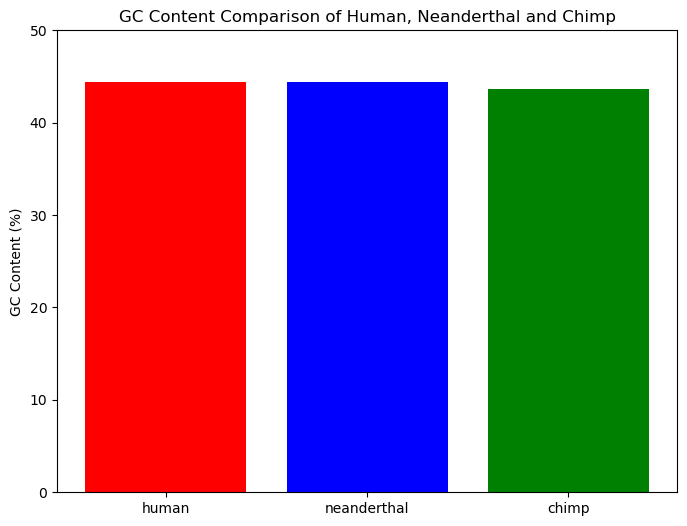

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
organisms = ['human', 'neanderthal', 'chimp']
gc_content_values = [human_gc, neanderthal_gc, chimp_gc] 

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(organisms, gc_content_values, color=['r', 'b', 'g'])

# Add labels and title
plt.ylabel('GC Content (%)')
plt.title('GC Content Comparison of Human, Neanderthal and Chimp')
plt.ylim(0, 50) # Set y-axis limit from 0 to 100

# Display the chart
plt.show()

In [9]:
from Bio import Align

# Create a new aligner object. We'll set the scoring.
# 'match_score=1' means matching bases get 1 point.
# 'mismatch_score=0' means non-matching bases get 0 points.

aligner = Align.PairwiseAligner()
aligner.match_score = 1.0
aligner.mismatch_score = 0.0

# Align the two sequences and get the alignment score
score = aligner.score(human_seq, neanderthal_seq)
score2 = aligner.score(human_seq, chimp_seq)

print("--- DNA Sequence Alignment Score ---")
print(f"Alignment Score: Human and Neanderthal:{score}, Human and Chimp:{score2}")

# Let's also print the alignment to see what it looks like

#print("--- Alignment Details(Human and Neanderthal) (First 1) ---")
#for alignment in aligner.align(human_seq, neanderthal_seq):
 #   print(alignment)
  #  break  # We only need to show the first alignment

#print("--- Alignment Details(Human and Chimp) (First 1) ---")
#for alignment in aligner.align(human_seq, chimp_seq):
 #   print(alignment)
  #  break  # We only need to show the first alignment
   

--- DNA Sequence Alignment Score ---
Alignment Score: Human and Neanderthal:16352.0, Human and Chimp:13478.0


In [10]:

alignment_neanderthal = aligner.align(human_seq, neanderthal_seq)[0]
alignment_chimp = aligner.align(human_seq, chimp_seq)[0]

print("="*60)
print("GENETIC KINSHIP & EVOLUTIONARY DISTANCE REPORT")
print("="*60)
print(f"TARGET SPECIES COMPARISON (Reference: Homo Sapiens)\n")

score_neanderthal = aligner.score(human_seq, neanderthal_seq)
score_chimp = aligner.score(human_seq, chimp_seq)

print(f"► SPECIES: Homo Sapiens Neanderthalensis")
print(f"• Alignment Score: {score_neanderthal:.1f}")
print(f"• Genetic Status:  CLOSEST KIN (Kuzen)")
print(f"• Visual Alignment (First 80 bases):")
print("-" * 60)
# Sadece ilk 80 baz
print(alignment_neanderthal[:, :80]) 
print("-" * 60)
print("\n")


print(f"► SPECIES: Pan Troglodytes (Chimpanzee)")
print(f"• Alignment Score: {score_chimp:.1f}")
print(f"• Genetic Status:  DISTANT RELATIVE (Uzak Akraba)")
print(f"• Visual Alignment (First 80 bases):")
print("-" * 60)

print(alignment_chimp[:, :80])
print("-" * 60)



GENETIC KINSHIP & EVOLUTIONARY DISTANCE REPORT
TARGET SPECIES COMPARISON (Reference: Homo Sapiens)

► SPECIES: Homo Sapiens Neanderthalensis
• Alignment Score: 16352.0
• Genetic Status:  CLOSEST KIN (Kuzen)
• Visual Alignment (First 80 bases):
------------------------------------------------------------
target            0 GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTT
                  0 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query             0 GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTT

target           60 CGTCTGGGGGGTATGCACGC 80
                 60 ||||||||||||.||||||| 80
query            60 CGTCTGGGGGGTGTGCACGC 80

------------------------------------------------------------


► SPECIES: Pan Troglodytes (Chimpanzee)
• Alignment Score: 13478.0
• Genetic Status:  DISTANT RELATIVE (Uzak Akraba)
• Visual Alignment (First 80 bases):
------------------------------------------------------------
target            0 GATCACAGGTCTATCACCCT